[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Image Search in Large Datasets

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/image-search.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/image-search.ipynb)

With the ever increasing data generated every day, it's important to have efficient ways to search through large image dataset to find the ones you need.

If you only have a CPU only machine and want to search through a large dataset using image as queries, this tutorial is for you.

We will walk you through how to use fastdup to search through thousands of images and find similar looking images to your query image.

## Installation

In [1]:
!pip install fastdup -Uq

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.25'

## Shoppee Product Match Dataset

In this notebook we will use the a dataset from [Shopee Product Match Kaggle Competition](https://www.kaggle.com/competitions/shopee-product-matching/data). In this competition, participants must determine if two products are the same by their images.

Head to Kaggle and download the dataset into your local directory. You should have a folder named `shopee-product-matching` in your current working directory.

With the dataset downloaded, let's randomly pick a few images and preview them.

In [3]:
sample_images=!find shopee-product-matching/ -name '*.jpg'
ret = fastdup.generate_sprite_image(sample_images, 55, ".")[0]

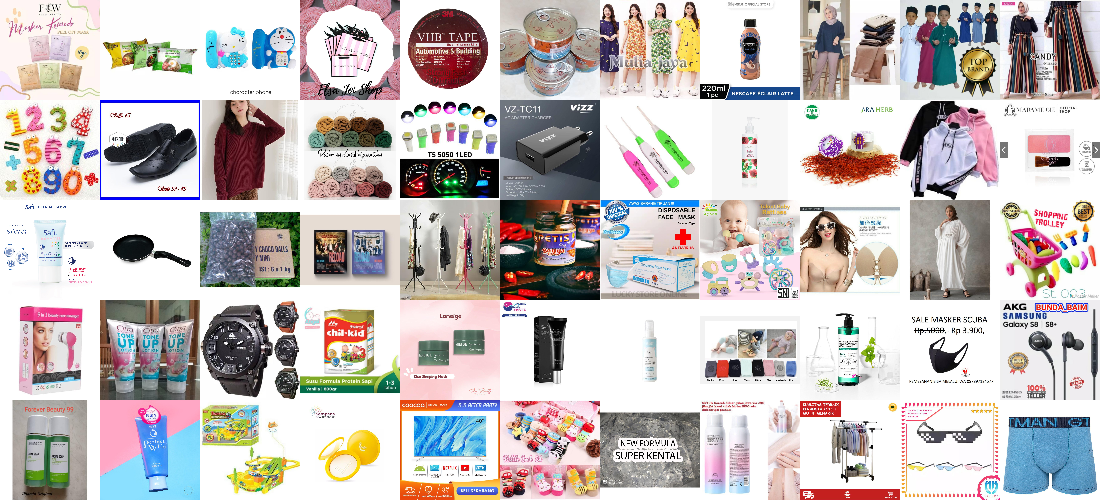

In [4]:
from IPython.display import Image
Image(filename=ret)

## Run fastdup

Point `input_dir` to the location you store the images.

In [5]:
input_dir = "./shopee-product-matching"
work_dir = "./my-fastdup-workdir"

fastdup.run(input_dir, work_dir)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-12 15:46:12 [INFO] Going to loop over dir shopee-product-matching
2023-07-12 15:46:12 [INFO] Found total 32415 images to run on, 32415 train, 0 test, name list 32415, counter 32415 
2023-07-12 15:47:33 [INFO] Found total 32415 images to run onimated: 0 Minutes
Finished histogram 9.543
Finished bucket sort 9.603
2023-07-12 15:47:36 [INFO] 3734) Finished write_index() NN model
2023-07-12 15:47:36 [INFO] Stored nn model index file my-fastdup-workdir/nnf.index
2023-07-12 15:47:39 [INFO] Total time took 86333 ms
2023-07-12 15:47:39 [INFO] Found a total of 8020 fully identical images (d>0.990), which are 12.37 %
2023-07-12 15:47:39 [INFO] Found a total of 3283 nearly identical images(d>0.980), which are 5.06 %
2023-07-12 15:47:39 [INFO] Found a total of 24447 above threshold images (d>0.900), which are 37.71 %
2023-07-12 15:47:39 [INFO] Found a total of 3241 outlier images         (d<0.050), which are 5.00 %
2

0

## Restart Runtime

Once the run is complete you can terminate the session and use the generated arfifacts to run an image search.

Let's restart the kernel to simulate a different session.

In [6]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Initialize Search Parameters

To start searching we must first initialize the search parameters.

The first positional argument is `k` - The number of nearest neighbors to search for. 

In this case we want to search for 10 nearest neighbor. Feel free to experiment with your own number of `k`.

In [7]:
import fastdup
fastdup.init_search(10, work_dir=work_dir)

2023-07-12 15:47:39 [INFO] 60) Finished load_index() NN model, num_images 32415
2023-07-12 15:47:39 [INFO] Read nnf index file from ./my-fastdup-workdir/nnf.index 1
2023-07-12 15:47:39 [INFO] Read NNF index with 32415 images
init_search() initialized OK.


0

## Search with a Query Image

Let's use our own image and find out if there are matches in the shopee dataset.

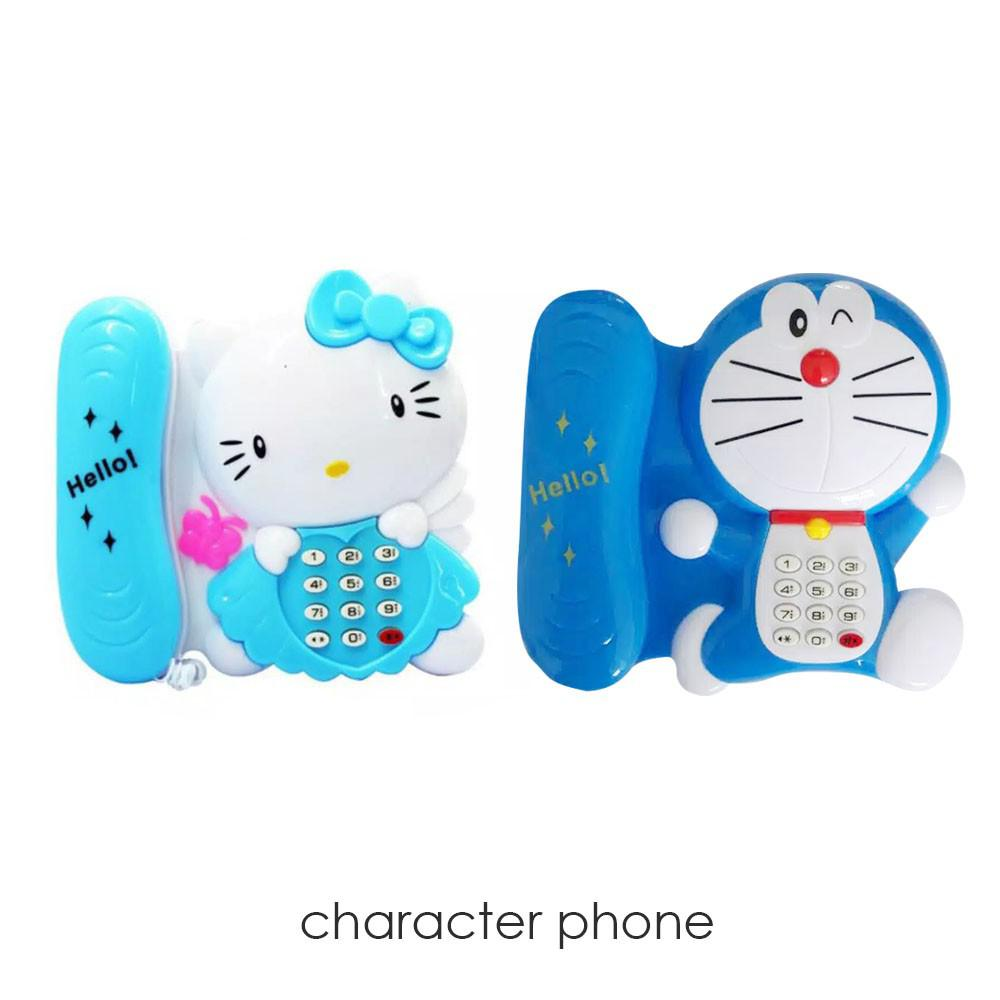

In [8]:
from IPython.display import Image
Image(filename="test_image.jpg")

Specify the query image filename and search for similar images in the images directory.

In [9]:
df = fastdup.search("test_image.jpg")

2023-07-12 15:47:39 [INFO] Total time took 34 ms
2023-07-12 15:47:39 [INFO] Found a total of 1 fully identical images (d>0.990), which are 0.00 %
2023-07-12 15:47:39 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-07-12 15:47:39 [INFO] Found a total of 1 above threshold images (d>0.900), which are 0.00 %
2023-07-12 15:47:39 [INFO] Found a total of 1 outlier images         (d<0.050), which are 0.00 %
2023-07-12 15:47:39 [INFO] Min distance found 0.822 max distance 1.000


Inspect the search result.

The `distance` value indicate how similar is your query image to the other image. 

A `distance` of `1.0` indicates the images are exact duplicates. The lower the value, the less similar the images are.

In [ ]:
df

You can repeat the search as many times as you wish as long as the model is loaded in memory.

Let's try to search using another query image.

In [ ]:
Image(filename="test_image2.jpg")

In [ ]:
df2 = fastdup.search("test_image2.jpg")

In [ ]:
df2

## Visualize Results

This step is optional. fastdup provides a convenient way to visualize your search results for duplicate and similar looking images.

In [ ]:
fastdup.create_duplicates_gallery(df, work_dir, input_dir="./shopee-product-matching")

In [ ]:
from IPython.display import HTML
HTML(filename="duplicates.html")

In [ ]:
fastdup.create_similarity_gallery(df, work_dir, input_dir=input_dir, min_items=3)
HTML(filename="similarity.html")

Looks like we found a duplicate product using our test image!

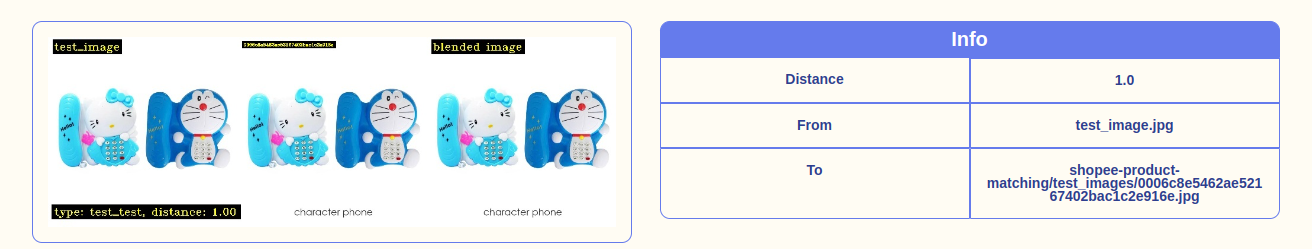

Feel free to repeat the search using other images and visualize them.

## Wrap up
Congratulations! You've made it to the end of the tutorial!

Image similarity search is an incredibly powerful tookit to have in your arsenal as a machine learning practitioner.

For example, if your model is not performing well on a particular category of images, you could use image search to find more examples of that category and add them to your training data.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).